In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',1000)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [124]:
df1 = pd.read_csv('titanic.csv')
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [125]:
#the dataset has 891 instances , 11 independent variables and 1 target variable which is 'Survived'
df1.shape

(891, 12)

In [126]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [127]:
#SibSp stands for siblings,spouse and Parch stands for Parents,child we will create a new column by adding SibSp and Parch
# and drop their indivisual variable 
df1['along'] = df1['SibSp'] + df1['Parch']
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,along
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [128]:
df1.drop(['SibSp','Parch'],axis=1,inplace=True)

In [129]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,along
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


In [130]:
#removing cabin,ticket,name and passengerId columns. Cabin is removed as it has more thn 70% of missing values
df1.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
df1.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,along
0,0,3,male,22.0,7.2500,S,1
1,1,1,female,38.0,71.2833,C,1
2,1,3,female,26.0,7.9250,S,0
3,1,1,female,35.0,53.1000,S,1
4,0,3,male,35.0,8.0500,S,0


In [131]:
df1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
Embarked      2
along         0
dtype: int64

In [132]:
df1['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [133]:
df1.Embarked.mode()

0    S
dtype: object

In [134]:
#filling Nan value with mode which is "S"
df1["Embarked"].fillna("S", inplace=True)

In [135]:
df1['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [136]:
df1['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

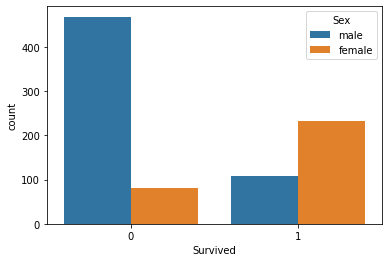

In [137]:
sns.countplot(x='Survived',hue='Sex',data=df1)
#most of the male have not survived , and most of the female have survived

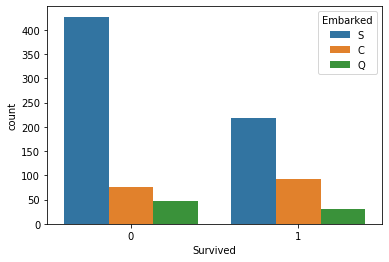

In [138]:
sns.countplot(x=df1['Survived'],hue=df1['Embarked'])

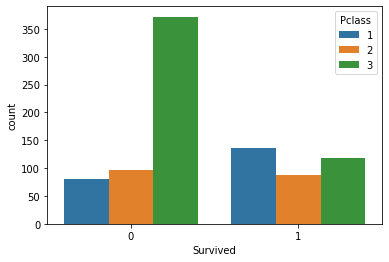

In [139]:
sns.countplot(x='Survived',hue="Pclass",data=df1)

In [140]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [141]:
df1['Sex'] = le.fit_transform(df1['Sex'])
df1['Embarked']=le.fit_transform(df1['Embarked'])

In [142]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       714 non-null    float64
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    int32  
 6   along     891 non-null    int64  
dtypes: float64(2), int32(2), int64(3)
memory usage: 41.9 KB


In [143]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

In [144]:
df1.Age = imp.fit_transform(df1['Age'].values.reshape(-1,1))[:,0]
df1.Age

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
5      29.699118
6      54.000000
7       2.000000
8      27.000000
9      14.000000
10      4.000000
11     58.000000
12     20.000000
13     39.000000
14     14.000000
15     55.000000
16      2.000000
17     29.699118
18     31.000000
19     29.699118
20     35.000000
21     34.000000
22     15.000000
23     28.000000
24      8.000000
25     38.000000
26     29.699118
27     19.000000
28     29.699118
29     29.699118
30     40.000000
31     29.699118
32     29.699118
33     66.000000
34     28.000000
35     42.000000
36     29.699118
37     21.000000
38     18.000000
39     14.000000
40     40.000000
41     27.000000
42     29.699118
43      3.000000
44     19.000000
45     29.699118
46     29.699118
47     29.699118
48     29.699118
49     18.000000
50      7.000000
51     21.000000
52     49.000000
53     29.000000
54     65.000000
55     29.699118
56     21.000000
57     28.500000
58      5.0000

In [145]:
df1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
along       0
dtype: int64

In [146]:
df1.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,along
0,0,3,1,22.0,7.2500,2,1
1,1,1,0,38.0,71.2833,0,1
2,1,3,0,26.0,7.9250,2,0
3,1,1,0,35.0,53.1000,2,1
4,0,3,1,35.0,8.0500,2,0


In [147]:
df1.describe()

,Survived,Pclass,Sex,Age,Fare,Embarked,along
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,32.204208,1.536476,0.904602
std,0.486592,0.836071,0.477990,13.002015,49.693429,0.791503,1.613459
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,7.910400,1.000000,0.000000
50%,0.000000,3.000000,1.000000,29.699118,14.454200,2.000000,0.000000
75%,1.000000,3.000000,1.000000,35.000000,31.000000,2.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,512.329200,2.000000,10.000000


In [148]:
from scipy.stats import zscore

In [149]:
z = np.abs(zscore(df1))
z

array([[0.78927234, 0.82737724, 0.73769513, ..., 0.50244517, 0.58595414,
        0.05915988],
       [1.2669898 , 1.56610693, 1.35557354, ..., 0.78684529, 1.9423032 ,
        0.05915988],
       [1.2669898 , 0.82737724, 1.35557354, ..., 0.48885426, 0.58595414,
        0.56097483],
       ...,
       [0.78927234, 0.82737724, 1.35557354, ..., 0.17626324, 0.58595414,
        1.29942929],
       [1.2669898 , 1.56610693, 0.73769513, ..., 0.04438104, 1.9423032 ,
        0.56097483],
       [0.78927234, 0.82737724, 0.73769513, ..., 0.49237783, 0.67817453,
        0.56097483]])

In [150]:
threshold = 3
print(np.where(z>3))

(array([ 13,  25,  27,  59,  68,  71,  88,  96, 116, 118, 119, 159, 180,
       182, 201, 233, 258, 261, 299, 311, 324, 341, 377, 380, 386, 438,
       480, 493, 527, 541, 542, 557, 610, 630, 672, 678, 679, 683, 689,
       700, 716, 730, 737, 742, 745, 779, 792, 813, 846, 850, 851, 863],
      dtype=int64), array([6, 6, 4, 6, 6, 6, 4, 3, 3, 4, 6, 6, 6, 6, 6, 6, 4, 6, 4, 4, 6, 4,
       4, 4, 6, 4, 6, 3, 4, 6, 6, 4, 6, 3, 3, 6, 4, 6, 4, 4, 4, 4, 4, 4,
       3, 4, 6, 6, 6, 6, 3, 6], dtype=int64))


In [151]:
df1_new =df1[(z<3).all(axis=1)]
df1_new.shape

(839, 7)

In [153]:
collist=df1_new.columns.values
collist

array(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'along'],
      dtype=object)

In [156]:
collist=df1_new.columns.values
ncol=12
nrows = 10

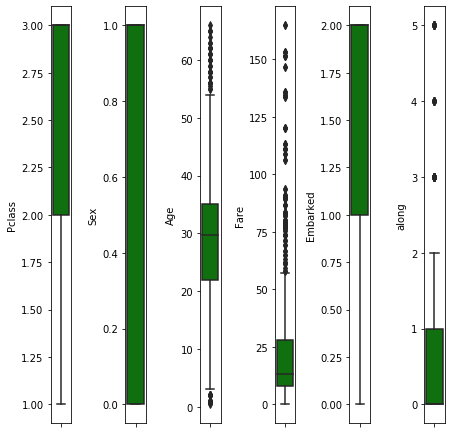

In [158]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df1_new[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [164]:
df1_new_cor = df1_new.corr()
df1_new_cor

,Survived,Pclass,Sex,Age,Fare,Embarked,along
Survived,1.000000,-0.329653,-0.550216,-0.074123,0.322609,-0.156654,0.106776
Pclass,-0.329653,1.000000,0.136264,-0.330216,-0.682273,0.120962,-0.009415
Sex,-0.550216,0.136264,1.000000,0.067358,-0.238924,0.114244,-0.237568
Age,-0.074123,-0.330216,0.067358,1.000000,0.143150,-0.004285,-0.258342
Fare,0.322609,-0.682273,-0.238924,0.143150,1.000000,-0.188965,0.278035
Embarked,-0.156654,0.120962,0.114244,-0.004285,-0.188965,1.000000,-0.003651
along,0.106776,-0.009415,-0.237568,-0.258342,0.278035,-0.003651,1.000000


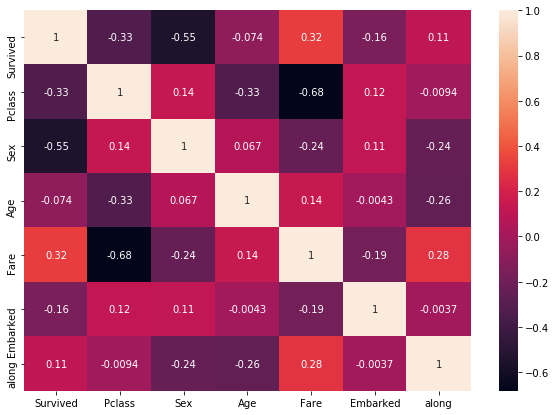

In [165]:
plt.subplots(figsize=(10,7))
sns.heatmap(df1_new_cor,annot=True,)

In [159]:
from sklearn.preprocessing import power_transform

In [161]:
X = df1_new.drop('Survived',axis=1)
X.head()

,Pclass,Sex,Age,Fare,Embarked,along
0,3,1,22.0,7.2500,2,1
1,1,0,38.0,71.2833,0,1
2,3,0,26.0,7.9250,2,0
3,1,0,35.0,53.1000,2,1
4,3,1,35.0,8.0500,2,0


In [162]:
y = df1_new['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [163]:
from sklearn.preprocessing import StandardScaler

In [168]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_sc

array([[ 0.82148036,  0.72488244, -0.61783508, -0.63427598,  0.58347344,
         0.26944856],
       [-1.60963788, -1.37953405,  0.67946824,  1.53709854, -1.96618392,
         0.26944856],
       [ 0.82148036, -1.37953405, -0.29350925, -0.61138667,  0.58347344,
        -0.61709003],
       ...,
       [ 0.82148036, -1.37953405,  0.0064206 , -0.08493263,  0.58347344,
         2.04252574],
       [-1.60963788,  0.72488244, -0.29350925,  0.13717841, -1.96618392,
        -0.61709003],
       [ 0.82148036,  0.72488244,  0.1929795 , -0.61732093, -0.69135524,
        -0.61709003]])

In [170]:
from sklearn.model_selection import train_test_split

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X_sc,y,test_size=0.2,random_state = 42)

In [174]:
print('shape of X_train:', X_train.shape)
print('shape of X_test:', X_test.shape)
print('shape of y_train:', y_train.shape)
print('shape of y_test:', y_test.shape)

shape of X_train: (671, 6)
shape of X_test: (168, 6)
shape of y_train: (671,)
shape of y_test: (168,)


In [175]:
#preparing a logistic regression model
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg_model = lg.fit(X_train,y_train)
lg_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [176]:
pred = lg.predict(X_test)
print(pred)

[0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1
 1 0 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 1 0
 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1
 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 1
 0 0 0 0 0 1 1 0 1 1 1 1 0 1 1 0 0 0 1 0]


In [178]:
print("Accuracy score :", accuracy_score(y_test,pred))

Accuracy score : 0.8273809523809523


In [179]:
print("confusion metrix:", confusion_matrix(y_test,pred))

confusion metrix: [[88 13]
 [16 51]]


In [180]:
print("Classification report :",classification_report(y_test,pred))

Classification report :               precision    recall  f1-score   support

           0       0.85      0.87      0.86       101
           1       0.80      0.76      0.78        67

    accuracy                           0.83       168
   macro avg       0.82      0.82      0.82       168
weighted avg       0.83      0.83      0.83       168



In [ ]:
#creating a decision tree model

In [182]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
dc_model = dc.fit(X_train,y_train)
dc_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [183]:
dc_pred = dc.predict(X_test)
dc_pred

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0], dtype=int64)

In [184]:
print('Accuracy score by Decision tree :', accuracy_score(y_test,dc_pred))

Accuracy score by Decision tree : 0.7738095238095238


In [185]:
#creating a SCV model

In [186]:
from sklearn.svm import SVC
svc = SVC()
SVC_model = svc.fit(X_train,y_train)
SVC_model

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [187]:
SVC_pred = svc.predict(X_test)
SVC_pred

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [188]:
print("Accuracy score of SVC is :", accuracy_score(y_test,SVC_pred))

Accuracy score of SVC is : 0.8511904761904762


In [189]:
#saving the model
from sklearn.externals import joblib
joblib.dump(dc_pred,'Titanic.pkl')

['Titanic.pkl']